<a href="https://colab.research.google.com/github/moiseuwimana/Credit-approval/blob/main/project_loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats


from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


## Data Collection

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Next/data/Loan Approval Prediction/train.csv')

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Archeology (Data Profiling)

Examining, analyzing, reviewing and summarizing data sets to gain insight into the quality of data is going to be proceeded


***Checking the missing values***

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

INTERPRETATION: ????

***Data type checking***

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


INTERPRETATION: ?????

In [8]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

***Categorical data investigation***

In [9]:
df.nunique() / len(df)

Loan_ID              1.000000
Gender               0.003257
Married              0.003257
Dependents           0.006515
Education            0.003257
Self_Employed        0.003257
ApplicantIncome      0.822476
CoapplicantIncome    0.467427
LoanAmount           0.330619
Loan_Amount_Term     0.016287
Credit_History       0.003257
Property_Area        0.004886
Loan_Status          0.003257
dtype: float64

INTERPRETATION:
* From the categorical data investigation; loan_id, ApplicantIncome, coapplicantIncome, loanAmount are non-categorical data because of high percentage of non repeting numbers whereas other have low percentage of repeating values, therefore are categorical values



***Missing values checking***

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

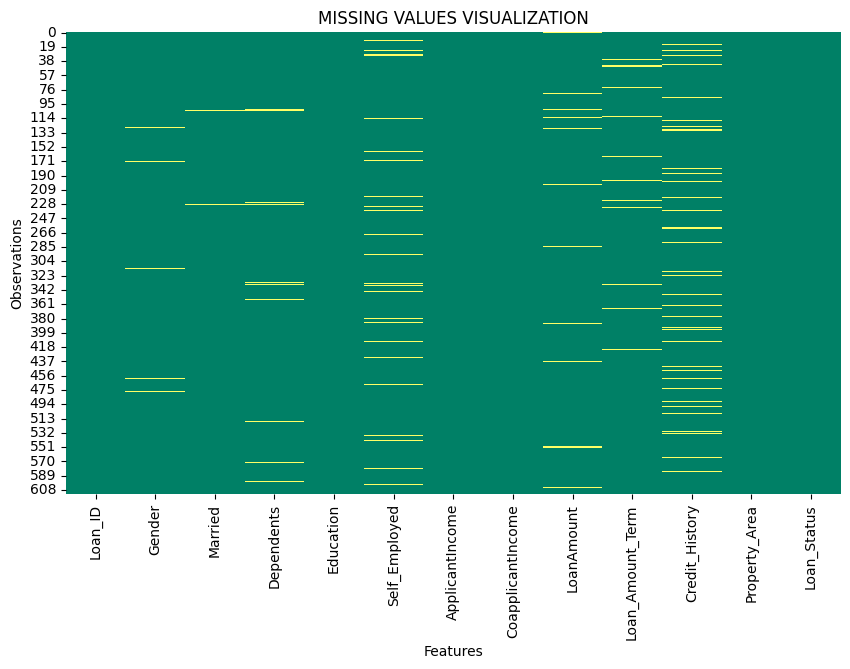

In [11]:
# visualize the missing values again
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar = False, cmap="summer")
plt.title("MISSING VALUES VISUALIZATION")
plt.ylabel("Observations")
plt.xlabel("Features")
plt.show()

INTERPRETATION: ?????

***Statistical checking***

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


INTERPRETATION: ???

***Row Duplicate checking***

In [13]:
df.duplicated().sum()

0

## Data Cleaning

#### Addressing missing values

In [14]:
column_name = df.columns
for feature in column_name:
  if df[feature].dtype == "O":
    df[feature].fillna(df[feature].mode()[0], inplace=True)
  else:
    df[feature].fillna(df[feature].median(), inplace=True)

INTERPRATION:
* All the missing object data type have been be filled with the most frequent values
* All the missing non-object data type have been filled with the median

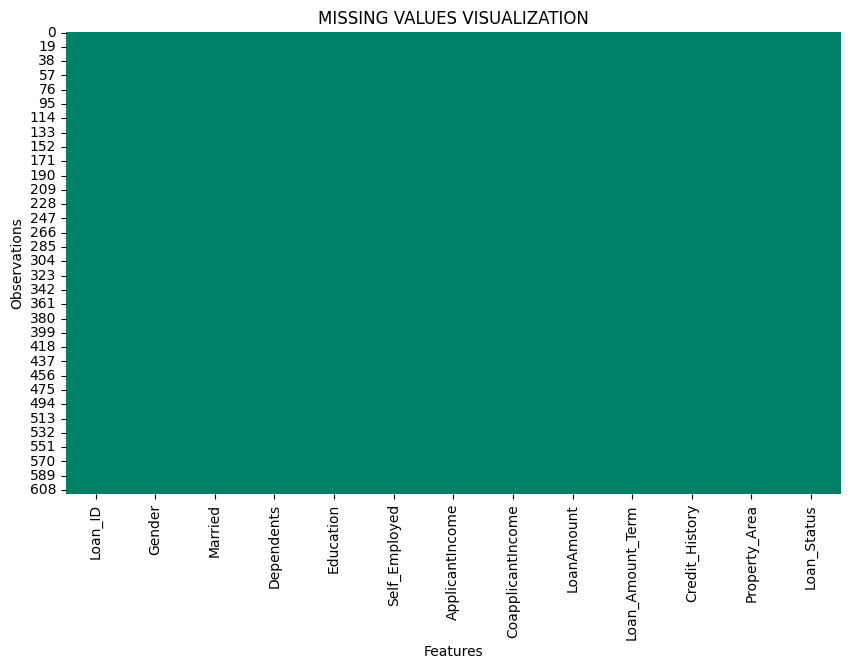

In [15]:
# visualize the missing values again
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar = False, cmap="summer")
plt.title("MISSING VALUES VISUALIZATION")
plt.ylabel("Observations")
plt.xlabel("Features")
plt.show()

## Exploratory Analysis (EDA)

**drop "Loan_ID" column for its unique values **

In [16]:
df.drop('Loan_ID',axis=1,inplace=True)

In [17]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**Loan Status - Eligibility**

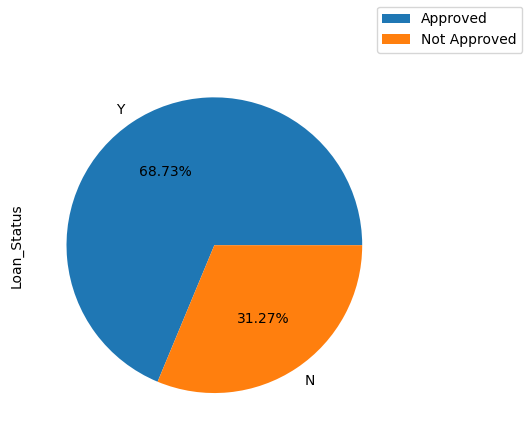

In [18]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.figlegend(["Approved","Not Approved"])

**Loan Status Based on the property area**

In [19]:
LoanStatus_based_on_PropertyArea = pd.crosstab(df['Property_Area'],df['Loan_Status'],values=df['Loan_Status'],aggfunc='count')
LoanStatus_based_on_PropertyArea

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


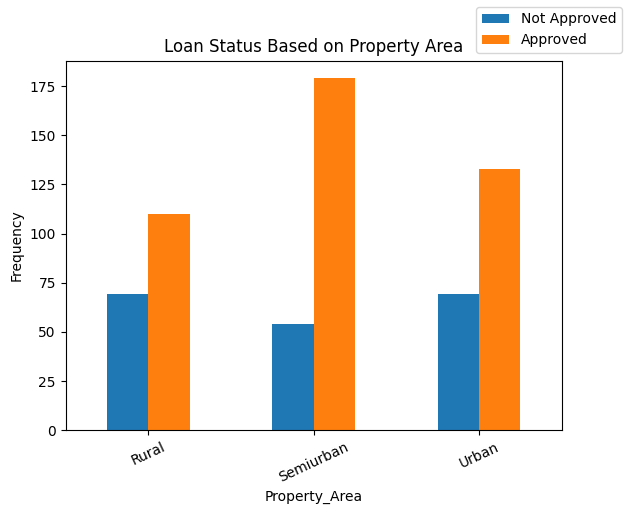

In [20]:
LoanStatus_based_on_PropertyArea.plot(kind='bar',legend=False)
plt.ylabel('Frequency')
plt.title('Loan Status Based on Property Area')
plt.xticks(rotation=25);
plt.figlegend(["Not Approved","Approved"])

**Distribution of Applicant Income**

In [21]:
# define a function signature
def findDistribution(df,feature_name):

  mask = df[feature_name].notna()

  data = df[mask][feature_name]

  # getting the information (count and bins_count) on data by using the histogram method from numpy library
  count,bins_count = np.histogram(data, bins=15)


  # plot "count" against "bins_count[1:]" and give a color of red with a label argument named "pdf"
  plt.plot(bins_count[1:],count)

  # plot the histogram by using "hist" method of pandas library again for better seeing the distribution
  (df[feature_name]).hist(bins=15)

  # give the graph the title
  plt.title(feature_name)

  # label x axis
  plt.xlabel(feature_name)

  # label y axis
  plt.ylabel("Applicants Number")

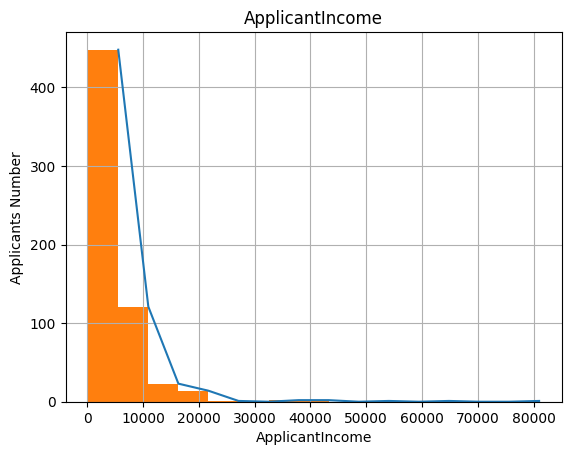

In [22]:
findDistribution(df,'ApplicantIncome')

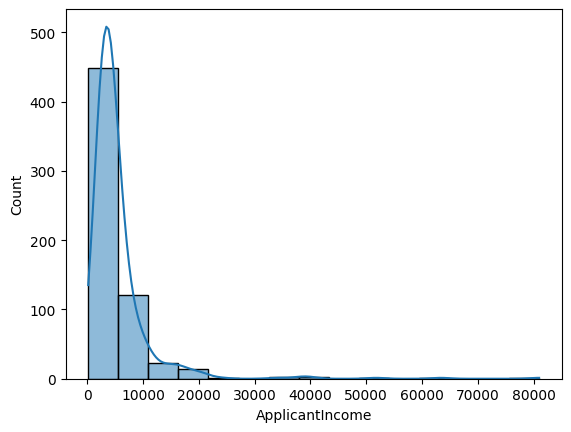

In [23]:
sns.histplot(df['ApplicantIncome'],bins=15,kde=True);

**loan status based on Credit History**

In [24]:
LoanStatus_based_on_CreditHistory = pd.crosstab(df['Credit_History'],df['Loan_Status'],values=df['Loan_Status'],aggfunc='count')
LoanStatus_based_on_CreditHistory

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


Text(0.5, 0, '0.0: No credit history, 1.0: Have Credit history')

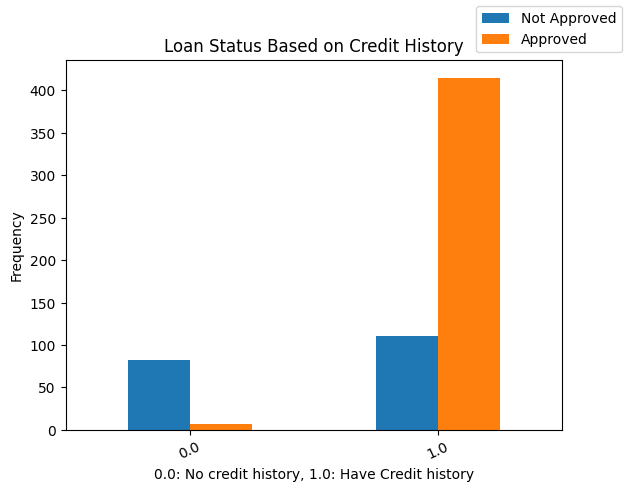

In [25]:
LoanStatus_based_on_CreditHistory.plot(kind='bar',legend=False)
plt.ylabel('Frequency')
plt.title('Loan Status Based on Credit History')
plt.xticks(rotation=25);
plt.figlegend(["Not Approved","Approved"])
plt.xlabel('0.0: No credit history, 1.0: Have Credit history')


**Correlation Analysis**

In [26]:
encoder = LabelEncoder()

In [27]:
for col in df.select_dtypes(include=['object']).columns:
    df[col+'_encoded'] = encoder.fit_transform(df[col])

In [28]:
corr_matrix = df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],axis=1).corr().round(2)[['Loan_Status_encoded']][:-1]
corr_matrix

,Loan_Status_encoded
ApplicantIncome,-0.00
CoapplicantIncome,-0.06
LoanAmount,-0.03
Loan_Amount_Term,-0.02
Credit_History,0.54
Gender_encoded,0.02
Married_encoded,0.09
Dependents_encoded,0.01
Education_encoded,-0.09
Self_Employed_encoded,-0.00


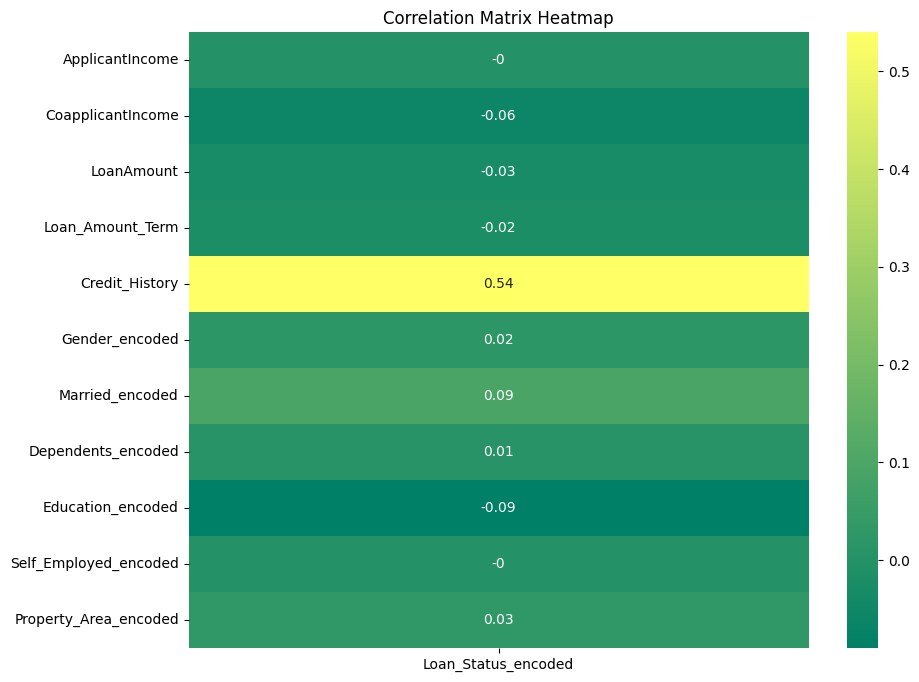

In [29]:
## plot corr matrix into heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='summer')
plt.title('Correlation Matrix Heatmap');

## Feature Engineering

Outlier exploration

finding outliers on the income

Text(0, 0.5, 'Features')

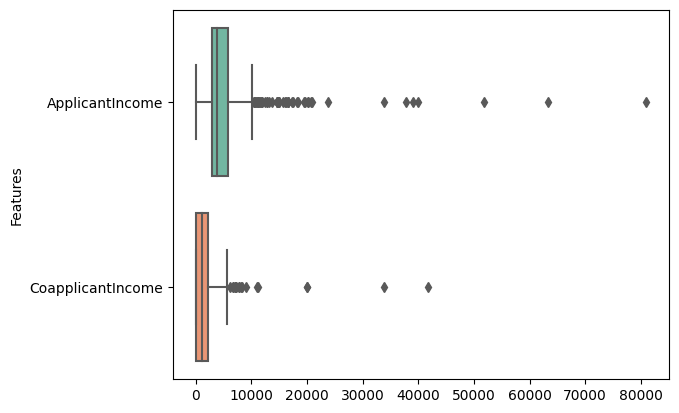

In [30]:


sns.boxplot(data=df[['ApplicantIncome','CoapplicantIncome']],orient='h',palette='Set2')
plt.ylabel("Features")

Handeling outlier

In [31]:


z_scores = stats.zscore(df[['ApplicantIncome','CoapplicantIncome']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = df[filtered_entries]



Outlier after being handled

Text(0, 0.5, 'Features')

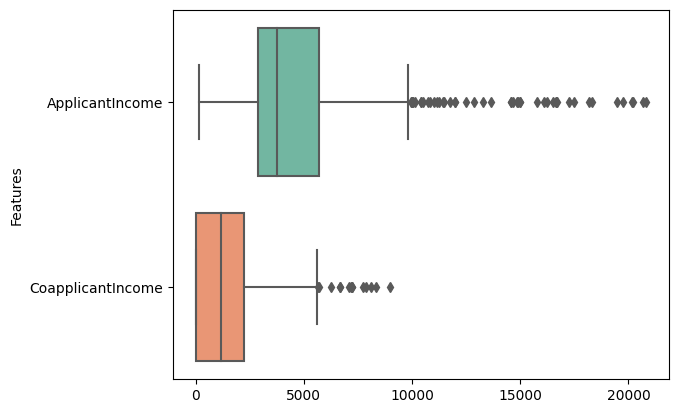

In [32]:
sns.boxplot(data=data[['ApplicantIncome','CoapplicantIncome']],orient='h',palette='Set2')
plt.ylabel("Features")

## Modelling

In [33]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_encoded', 'Married_encoded', 'Dependents_encoded',
       'Education_encoded', 'Self_Employed_encoded', 'Property_Area_encoded',
       'Loan_Status_encoded'],
      dtype='object')

**dependent and independent features**

In [53]:
X = data.drop(['Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status','Loan_Status_encoded'],axis=1)
y = data['Loan_Status_encoded']

**Train and test data**

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

**helper function for training, predicting and then find the score**

In [76]:
def findModelPerfomance(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_pred,y_test)
  print("Accuracy:", accuracy)

  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

**model 1 - Random Forest**

In [81]:
# a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)
findModelPerfomance(clf)

Accuracy: 0.7625
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.47      0.55       148
           1       0.79      0.89      0.84       332

    accuracy                           0.76       480
   macro avg       0.73      0.68      0.69       480
weighted avg       0.75      0.76      0.75       480

Confusion Matrix:
[[ 70  78]
 [ 36 296]]


**model 2 - (L2 Regularization) Ridge classifier**

In [83]:
ridge = RidgeClassifierCV()
findModelPerfomance(ridge)

Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.46      0.58       148
           1       0.80      0.94      0.86       332

    accuracy                           0.79       480
   macro avg       0.78      0.70      0.72       480
weighted avg       0.79      0.79      0.77       480

Confusion Matrix:
[[ 68  80]
 [ 20 312]]


**model 3 - Logistic Regression with L1(lasso) Regularization**

In [88]:
# Logistic Regression classifier with L1 (Lasso) regularization
logistic = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
findModelPerfomance(logistic)

Accuracy: 0.78125
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.45      0.56       148
           1       0.79      0.93      0.85       332

    accuracy                           0.78       480
   macro avg       0.76      0.69      0.71       480
weighted avg       0.77      0.78      0.76       480

Confusion Matrix:
[[ 67  81]
 [ 24 308]]


**model 4 - Logistic Regression with L1(lasso) and L2(ridge) Regularization**

In [89]:
# Logistic Regression classifier with Elastic Net regularization
elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
findModelPerfomance(elasticnet)

Accuracy: 0.6916666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       148
           1       0.69      1.00      0.82       332

    accuracy                           0.69       480
   macro avg       0.35      0.50      0.41       480
weighted avg       0.48      0.69      0.57       480

Confusion Matrix:
[[  0 148]
 [  0 332]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

**Model 5 - Decision tree**

In [86]:
tree = DecisionTreeClassifier(max_depth=5)
findModelPerfomance(tree)

Accuracy: 0.7645833333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.45      0.54       148
           1       0.79      0.90      0.84       332

    accuracy                           0.76       480
   macro avg       0.73      0.68      0.69       480
weighted avg       0.75      0.76      0.75       480

Confusion Matrix:
[[ 67  81]
 [ 32 300]]


In [90]:
%ls

drive/  sample_data/


In [91]:
%cd /content/drive/MyDrive/Next/src

/content/drive/MyDrive/Next/src


In [92]:
%pwd

'/content/drive/MyDrive/Next/src'

In [93]:
%ls

project-loan-approval.ipynb


In [110]:
!git config --global user.email "moiseuwimana04@gmail.com"
!git config --global user.name "moiseuwimana"

In [ ]:
!git remote -v

In [106]:

!git add /content/drive/MyDrive/Next/src/project-loan-approval.ipynb
!git commit -m "first commit"

[main 03f8a03] first commit
 1 file changed, 1 insertion(+), 1 deletion(-)


In [115]:
!git remote add origin https://github.com/moiseuwimana/Loan-approval-prediction---machine-learning-part-.git

error: remote origin already exists.


In [119]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [116]:
!git remote set-url origin https://github.com/moiseuwimana/Loan-approval-prediction---machine-learning-part-.git

In [118]:
!git remote -v


origin	https://github.com/moiseuwimana/Loan-approval-prediction---machine-learning-part-.git (fetch)
origin	https://github.com/moiseuwimana/Loan-approval-prediction---machine-learning-part-.git (push)
